# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [23]:
?zip()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

In [5]:
# weather_json['clouds']['all']
Cloudiness = []
# weather_json['sys']['country']
Country = []
#weather_json['dt']
Date =[]
# weather_json['main']['humidity']
Humidity = []
# weather_json['coord']['lat']
Lat = []
# weather_json['coord']['lon']
Lng = []
# weather_json['main']['temp_max']
Max_Temp = []
# weather_json['wind']['speed']
Wind_speed = []
responsecities = []

In [6]:
logfile = open("weatherlog.txt","w+")

In [8]:
print('Beginning Data Retrieval')
print('-----------------------------')
for i in range(len(cities)):
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + cities[i] + "&units=imperial"
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f'Processing Record {i} | {cities[i]}')
        logfile.write(f'Processing Record {i} | {cities[i]}\n')
        # store response
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_speed.append(weather_json['wind']['speed'])
        responsecities.append(cities[i])
      
    except:
        print("City\033[1m not\033[0;0m found. Skipping...")
        logfile.write(f'Processing Record {i} | {cities[i]}')
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 | rikitea
Processing Record 1 | luderitz
Processing Record 2 | mayumba
Processing Record 3 | bathsheba
Processing Record 4 | barrow
Processing Record 5 | goderich
Processing Record 6 | taoudenni
Processing Record 7 | lasa
Processing Record 8 | saint george
Processing Record 9 | derzhavinsk
Processing Record 10 | saint-francois
Processing Record 11 | kapaa
Processing Record 12 | tasiilaq
Processing Record 13 | aklavik
Processing Record 14 | georgetown
Processing Record 15 | shurugwi
Processing Record 16 | talakan
Processing Record 17 | juifang
City not found. Skipping...
Processing Record 18 | hvolsvollur
City not found. Skipping...
Processing Record 19 | tuktoyaktuk
Processing Record 20 | anadyr
Processing Record 21 | mbarara
Processing Record 22 | saldanha
Processing Record 23 | samdrup jongkhar
Processing Record 24 | katsuura
Processing Record 25 | huaraz
Processing Record 26 | necochea
Processing Record 27 | 

Processing Record 216 | ussel
Processing Record 217 | ahipara
Processing Record 218 | cidreira
Processing Record 219 | lagos
Processing Record 220 | kazan
Processing Record 221 | tallahassee
Processing Record 222 | drumheller
Processing Record 223 | san joaquin
Processing Record 224 | vitimskiy
City not found. Skipping...
Processing Record 225 | seoul
Processing Record 226 | puerto suarez
Processing Record 227 | mancio lima
City not found. Skipping...
Processing Record 228 | celestun
Processing Record 229 | tasbuget
City not found. Skipping...
Processing Record 230 | torbay
Processing Record 231 | bara
Processing Record 232 | alta floresta
Processing Record 233 | palabuhanratu
City not found. Skipping...
Processing Record 234 | dubrovnik
Processing Record 235 | seaham
Processing Record 236 | hamilton
Processing Record 237 | aykhal
Processing Record 238 | mayskiy
Processing Record 239 | ereymentau
Processing Record 240 | khandyga
Processing Record 241 | kodinsk
Processing Record 242 | d

Processing Record 438 | lodwar
Processing Record 439 | san policarpo
Processing Record 440 | tungkang
City not found. Skipping...
Processing Record 441 | kalaleh
Processing Record 442 | bayan
Processing Record 443 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 444 | pasaje
Processing Record 445 | paciran
Processing Record 446 | lazaro cardenas
Processing Record 447 | xining
Processing Record 448 | tisnov
Processing Record 449 | byron bay
Processing Record 450 | ostrovnoy
Processing Record 451 | tidore
City not found. Skipping...
Processing Record 452 | mergui
City not found. Skipping...
Processing Record 453 | la palma
Processing Record 454 | sumbawa
City not found. Skipping...
Processing Record 455 | odda
Processing Record 456 | marapanim
Processing Record 457 | bonaventure
Processing Record 458 | abapo
Processing Record 459 | srednekolymsk
Processing Record 460 | vestmannaeyjar
Processing Record 461 | pitimbu
Processing Record 462 | oussouye
Processing Record 463 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create dataframe
Weather_df = pd.DataFrame({"City": responsecities, "Cloudiness": Cloudiness, "Country": Country, 
                                     "Date": Date, "Humidity": Humidity, "Lat": Lat, "Lng": Lng, 
                                     "Max Temp": Max_Temp, "Wind Speed":Wind_speed})
Weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,32,PF,1547928944,100,-23.12,-134.97,79.50,11.25
1,luderitz,0,NA,1547929104,51,-26.65,15.16,66.54,25.23
2,mayumba,80,GA,1547929105,100,-3.44,10.65,78.42,6.22
3,bathsheba,40,BB,1547928000,65,13.22,-59.52,80.60,14.99
4,barrow,0,AR,1547929105,41,-38.31,-60.23,80.09,13.15


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

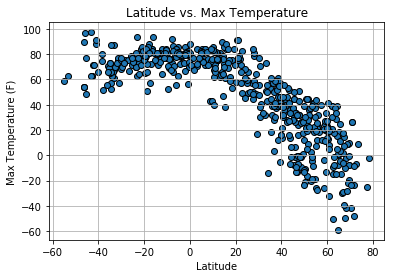

In [10]:
Weather_df.Lat = pd.to_numeric(Weather_df.Lat)
Weather_df['Max Temp'] = pd.to_numeric(Weather_df['Max Temp'])
plt.scatter(Weather_df.Lat,Weather_df['Max Temp'],edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature" )
plt.savefig("latVsTempPlot.png")

#### Latitude vs. Humidity Plot

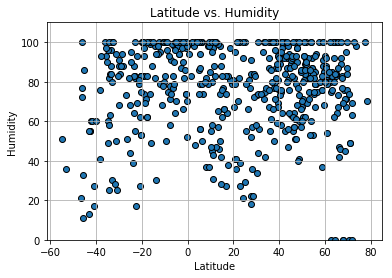

In [11]:
Weather_df.Humidity = pd.to_numeric(Weather_df.Humidity)
plt.scatter(Weather_df.Lat,Weather_df.Humidity,edgecolor='k')
plt.grid()
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity" )
plt.savefig("latVsHumidityPlot.png")

#### Latitude vs. Cloudiness Plot

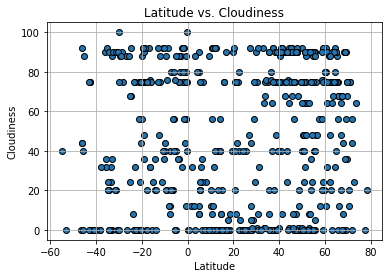

In [12]:
Weather_df.Cloudiness = pd.to_numeric(Weather_df.Cloudiness)
plt.scatter(Weather_df.Lat,Weather_df.Cloudiness,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness" )
plt.savefig("latVsCloudinessPlot.png")

#### Latitude vs. Wind Speed Plot

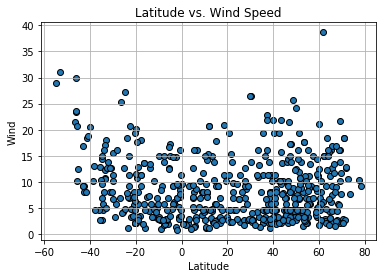

In [13]:
Weather_df['Wind Speed'] = pd.to_numeric(Weather_df['Wind Speed'])
plt.scatter(Weather_df.Lat,Weather_df['Wind Speed'],edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("Latitude vs. Wind Speed" )
plt.savefig("latVsWindSpeed.png")